In [1]:
# NumPy 라이브러리를 np 별칭으로 불러옴. 배열 및 수치 연산에 사용함.
import numpy as np

# Matplotlib의 pyplot 모듈을 plt 별칭으로 불러옴. 데이터 시각화에 사용함.
import matplotlib.pyplot as plt

# PyTorch 핵심 라이브러리를 불러옴. 딥러닝 모델 구축에 사용함.
import torch

# TorchVision 라이브러리를 불러옴. 비전 관련 데이터셋과 모델 등을 제공함.
import torchvision

# 신경망 레이어(nn) 모듈을 불러옴. 모델의 구성 요소를 정의함.
import torch.nn as nn

# 함수형 신경망 연산(F) 모듈을 불러옴. 활성화 함수나 풀링 등에 사용함.
import torch.nn.functional as F

# 이미지 데이터 변환(transforms) 모듈을 불러옴. 데이터 전처리에 사용함.
import torchvision.transforms as transforms

# PyTorch의 난수 생성기 시드(seed) 값을 55로 설정했음. 결과의 재현성을 보장함.
torch.manual_seed(55)

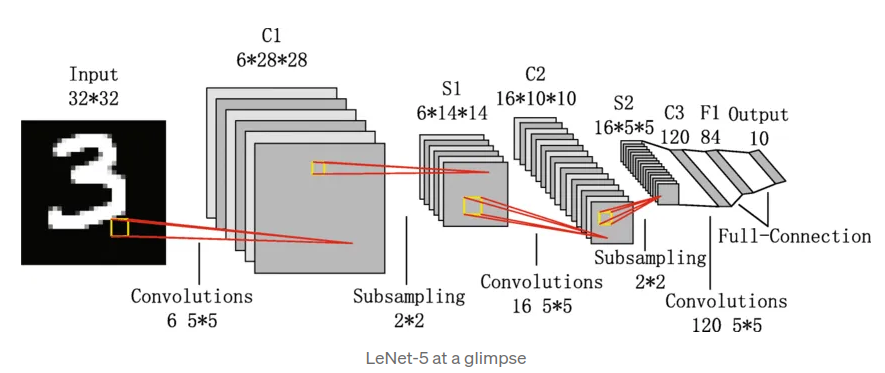

In [6]:
# LeNet 클래스를 정의함. nn.Module을 상속받아 PyTorch 신경망 모듈로 만듦.
class LeNet(nn.Module):

    # 클래스의 인스턴스를 초기화함. 레이어들을 정의함.
    def __init__(self):
        # 부모 클래스(nn.Module)의 생성자를 호출함.
        super(LeNet, self).__init__()

        # 첫 번째 합성곱 레이어(cn1)를 정의함.
        # 입력 채널 3개(RGB 이미지), 출력 특징 맵 6개, 커널 크기 5x5를 사용함.
        self.cn1 = nn.Conv2d(3, 6, 5)        # 1층 rgb (3) >> 6개 특징 (직선, 곡선 저수준)

        # 두 번째 합성곱 레이어(cn2)를 정의함.
        # 입력 채널 6개, 출력 특징 맵 16개, 커널 크기 5x5를 사용함.
        self.cn2 = nn.Conv2d(6, 16, 5)       # 2층 6개 >> 16개 특징  (형태 등 중-고수준) // 여기까지 특징 추출

        # 분류기 (classifier)
        # 첫 번째 완전 연결 레이어(fc1)를 정의함.
        # 입력 크기는 16 * 5 * 5 (이전 레이어의 출력 특징 맵 수 * 공간 크기), 출력 크기는 120임.
        self.fc1 = nn.Linear(16 * 5 * 5, 120) # 3층 400개 >> 120개

        # 두 번째 완전 연결 레이어(fc2)를 정의함.
        # 입력 120, 출력 84를 사용함.
        self.fc2 = nn.Linear(120, 84)         # 4층 120개 >> 84개

        # 세 번째 완전 연결 레이어(fc3)를 정의함.
        # 입력 84, 최종 출력 클래스 수 10개를 사용함.
        self.fc3 = nn.Linear(84, 10)          # 5층 84개 >> 10개 클래스

    # 데이터가 신경망을 통과하는 순서를 정의함 (순전파).
    def forward(self, x):

        # cn1을 적용하고 ReLU 활성화 함수를 통과시킴.
        x = F.relu(self.cn1(x))

        # 2x2 크기의 맥스 풀링을 적용함. 공간 크기를 절반으로 줄임.
        x = F.max_pool2d(x, (2, 2))

        # cn2를 적용하고 ReLU 활성화 함수를 통과시킴.
        x = F.relu(self.cn2(x))

        # 2x2 크기의 맥스 풀링을 다시 적용함.
        x = F.max_pool2d(x, (2, 2))

        # 데이터를 평탄화(flatten)함. 배치 차원(-1)을 제외한 모든 차원을 하나의 벡터로 만듦.
        # view() 에서 -1 은 batch_size 자동 계산
        # self.flattened_features(x) h*w (이미지) * channel(1: 흑백, 3: 컬러)
        # >> batch dimension 유지, 나머지 차원 (h*w*c) >> 1차원 벡터로 변환
        # Before flatten) batch_size = 32, x.shape = [32, 16, 5, 5] c=16, h=5, w=5
        # >> flatten) x.view(-1, 16*5*5) = (-1, 400) >> x.shape = [32, 400]
        # x = x.view(-1, self.flattened_features(x))
        x = x.view(x.shape[0], -1)

        # 첫 번째 완전 연결 레이어와 ReLU를 통과시킴.
        x = F.relu(self.fc1(x))

        # 두 번째 완전 연결 레이어와 ReLU를 통과시킴.
        x = F.relu(self.fc2(x))

        # 최종 출력 레이어를 통과시킴.
        x = self.fc3(x)

        # 최종 결과를 반환함.
        return x

    # 데이터를 평탄화하기 위해 특징들의 총 개수를 계산하는 헬퍼 함수임.
    def flattened_features(self, x):

        # 배치 차원(첫 번째 차원)을 제외한 나머지 차원들의 크기를 가져옴.
        size = x.size()[1:]
        num_feats = 1

        # 모든 차원 크기를 곱하여 총 특징 개수를 계산함.
        for s in size:
            num_feats *= s

        # 총 특징 개수를 반환함.
        return num_feats


# LeNet 클래스의 인스턴스를 생성함.
lenet = LeNet()

# 생성된 모델의 구조를 출력함.
print(lenet)

LeNet(
  (cn1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (cn2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [7]:
# eos

In [8]:
from torchinfo import summary
summary(lenet,(32,3,32,32))

Layer (type:depth-idx)                   Output Shape              Param #
LeNet                                    [32, 10]                  --
├─Conv2d: 1-1                            [32, 6, 28, 28]           456
├─Conv2d: 1-2                            [32, 16, 10, 10]          2,416
├─Linear: 1-3                            [32, 120]                 48,120
├─Linear: 1-4                            [32, 84]                  10,164
├─Linear: 1-5                            [32, 10]                  850
Total params: 62,006
Trainable params: 62,006
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 21.06
Input size (MB): 0.39
Forward/backward pass size (MB): 1.67
Params size (MB): 0.25
Estimated Total Size (MB): 2.31